In [1]:
import torch
torch.cuda.is_available()


True

# New Section

In [16]:
pip install torch torchvision matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 102.5 MB/s eta 0:00:00


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets

In [18]:
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.fc3 = nn.Linear(output_size, 3 * 32 * 32)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.tanh(self.fc3(x))
        x = x.view(-1, 3, 32, 32)
        return x

In [19]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# ✅ Initialize Model, Loss, Optimizer
input_size = 100
hidden_size = 256
output_size = 256
generator = Generator(input_size, hidden_size, output_size).cuda()
criterion = nn.MSELoss()
optimizer = optim.Adam(generator.parameters(), lr=0.0002)

100%|██████████| 170M/170M [00:13<00:00, 12.9MB/s]


Epoch [1/20], Step [100/782], Loss: 0.2516
Epoch [1/20], Step [200/782], Loss: 0.2569
Epoch [1/20], Step [300/782], Loss: 0.2246
Epoch [1/20], Step [400/782], Loss: 0.2576
Epoch [1/20], Step [500/782], Loss: 0.2652
Epoch [1/20], Step [600/782], Loss: 0.2517
Epoch [1/20], Step [700/782], Loss: 0.2589


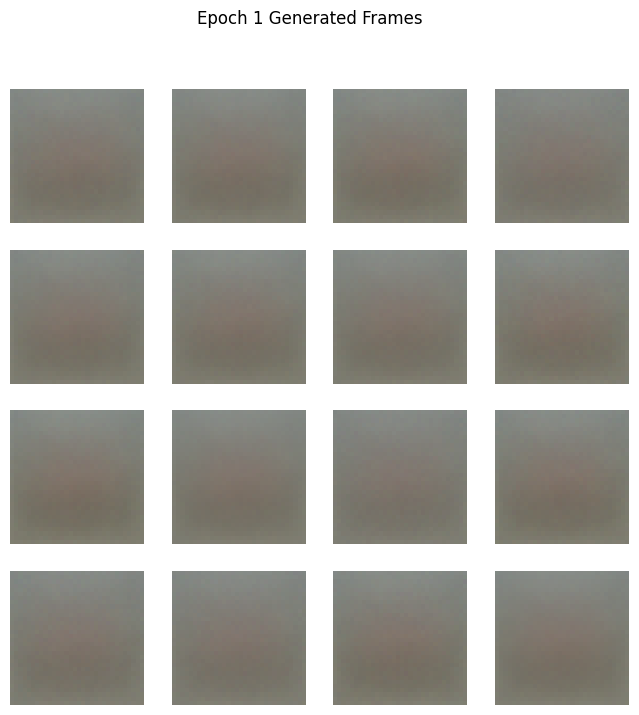

Epoch [2/20], Step [100/782], Loss: 0.2449
Epoch [2/20], Step [200/782], Loss: 0.2474
Epoch [2/20], Step [300/782], Loss: 0.2553
Epoch [2/20], Step [400/782], Loss: 0.2396
Epoch [2/20], Step [500/782], Loss: 0.2484
Epoch [2/20], Step [600/782], Loss: 0.2545
Epoch [2/20], Step [700/782], Loss: 0.2380


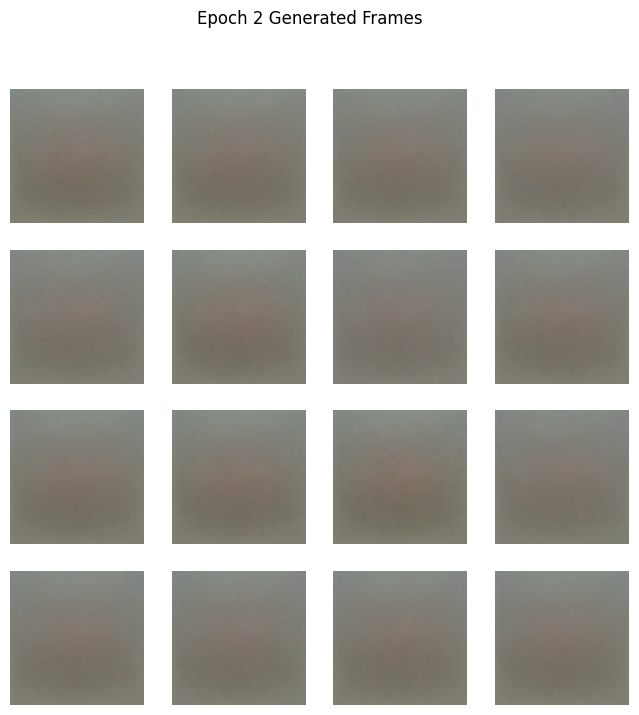

Epoch [3/20], Step [100/782], Loss: 0.2684
Epoch [3/20], Step [200/782], Loss: 0.2450
Epoch [3/20], Step [300/782], Loss: 0.2597
Epoch [3/20], Step [400/782], Loss: 0.2544
Epoch [3/20], Step [500/782], Loss: 0.2613
Epoch [3/20], Step [600/782], Loss: 0.2499
Epoch [3/20], Step [700/782], Loss: 0.2724


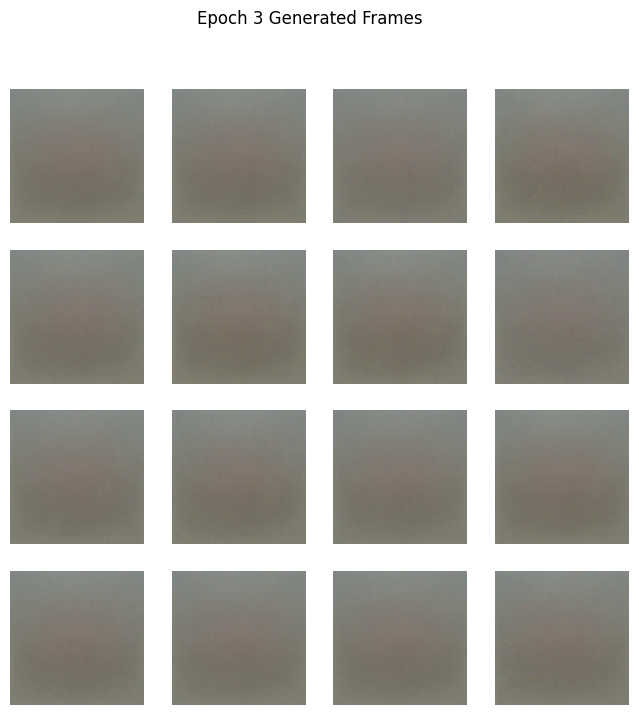

Epoch [4/20], Step [100/782], Loss: 0.2180
Epoch [4/20], Step [200/782], Loss: 0.2591
Epoch [4/20], Step [300/782], Loss: 0.2548
Epoch [4/20], Step [400/782], Loss: 0.2416
Epoch [4/20], Step [500/782], Loss: 0.2718
Epoch [4/20], Step [600/782], Loss: 0.2546
Epoch [4/20], Step [700/782], Loss: 0.2343


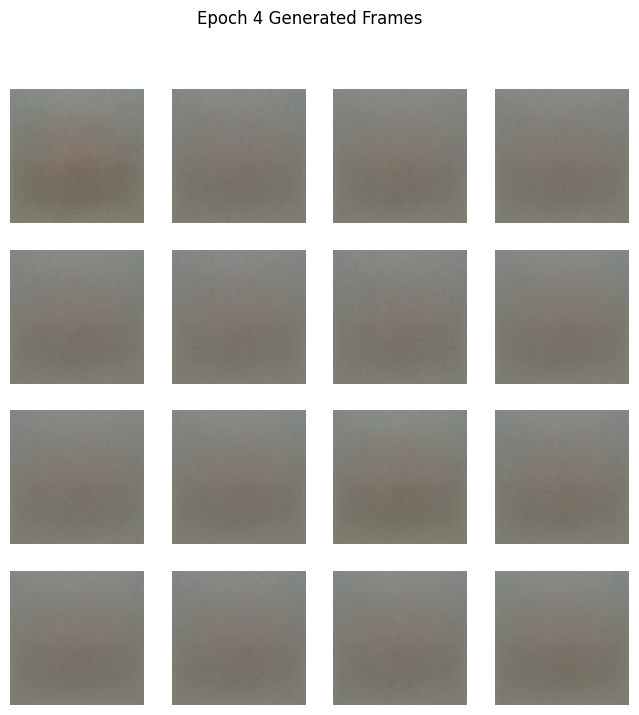

Epoch [5/20], Step [100/782], Loss: 0.2231
Epoch [5/20], Step [200/782], Loss: 0.2635
Epoch [5/20], Step [300/782], Loss: 0.2646
Epoch [5/20], Step [400/782], Loss: 0.2579
Epoch [5/20], Step [500/782], Loss: 0.2259
Epoch [5/20], Step [600/782], Loss: 0.2574
Epoch [5/20], Step [700/782], Loss: 0.2260


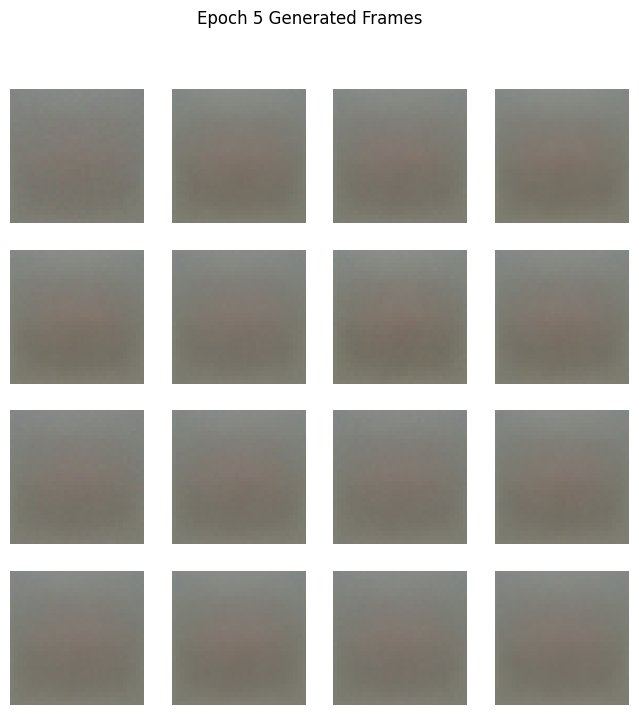

Epoch [6/20], Step [100/782], Loss: 0.2457
Epoch [6/20], Step [200/782], Loss: 0.2657
Epoch [6/20], Step [300/782], Loss: 0.2182
Epoch [6/20], Step [400/782], Loss: 0.2566
Epoch [6/20], Step [500/782], Loss: 0.2702
Epoch [6/20], Step [600/782], Loss: 0.2714
Epoch [6/20], Step [700/782], Loss: 0.2133


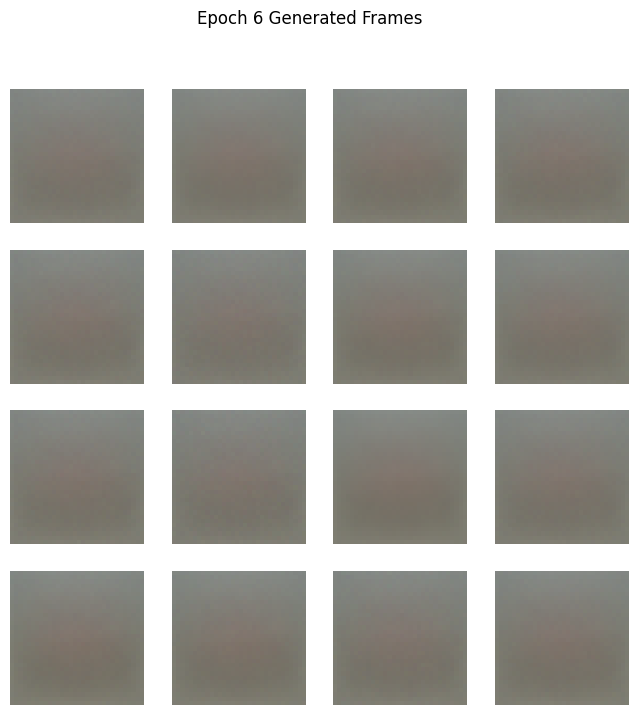

Epoch [7/20], Step [100/782], Loss: 0.2637
Epoch [7/20], Step [200/782], Loss: 0.2596
Epoch [7/20], Step [300/782], Loss: 0.2546
Epoch [7/20], Step [400/782], Loss: 0.2628
Epoch [7/20], Step [500/782], Loss: 0.2220
Epoch [7/20], Step [600/782], Loss: 0.2661
Epoch [7/20], Step [700/782], Loss: 0.2167


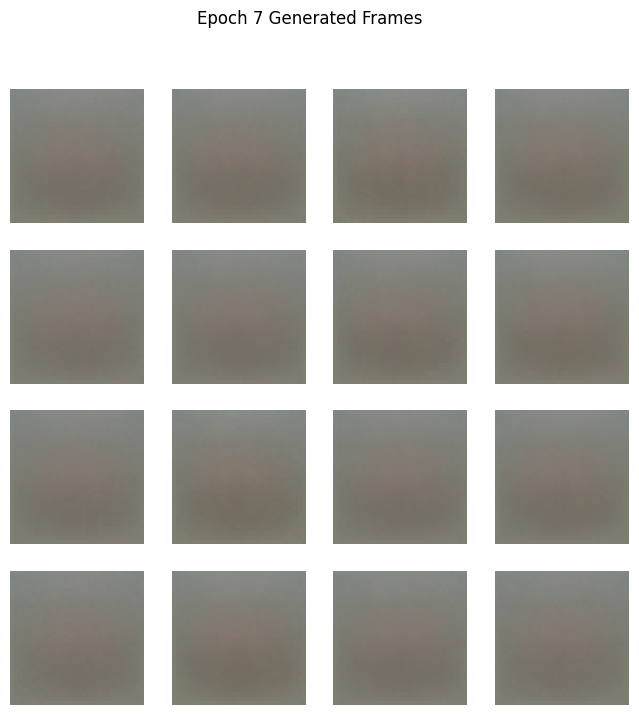

Epoch [8/20], Step [100/782], Loss: 0.2633
Epoch [8/20], Step [200/782], Loss: 0.2328
Epoch [8/20], Step [300/782], Loss: 0.2548
Epoch [8/20], Step [400/782], Loss: 0.2473
Epoch [8/20], Step [500/782], Loss: 0.2353
Epoch [8/20], Step [600/782], Loss: 0.2412
Epoch [8/20], Step [700/782], Loss: 0.2241


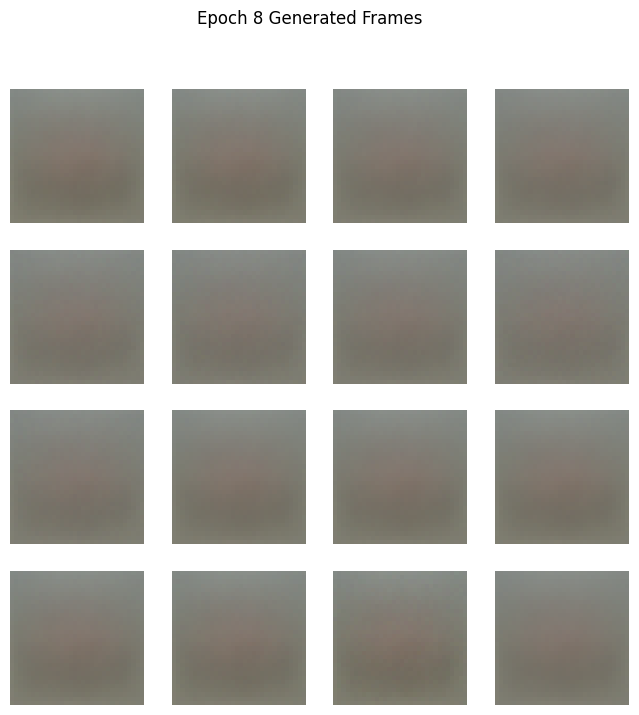

Epoch [9/20], Step [100/782], Loss: 0.2609
Epoch [9/20], Step [200/782], Loss: 0.2295
Epoch [9/20], Step [300/782], Loss: 0.2297
Epoch [9/20], Step [400/782], Loss: 0.2358
Epoch [9/20], Step [500/782], Loss: 0.2323
Epoch [9/20], Step [600/782], Loss: 0.2154
Epoch [9/20], Step [700/782], Loss: 0.2520


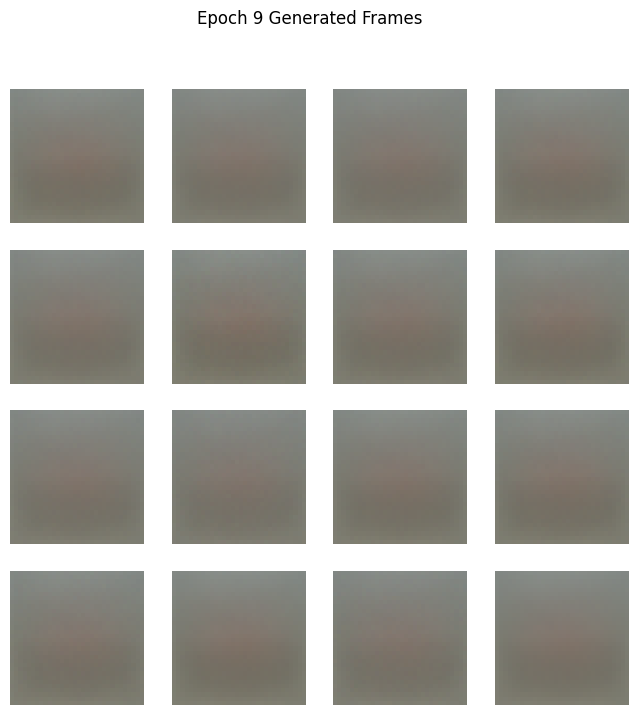

Epoch [10/20], Step [100/782], Loss: 0.2536
Epoch [10/20], Step [200/782], Loss: 0.2694
Epoch [10/20], Step [300/782], Loss: 0.2793
Epoch [10/20], Step [400/782], Loss: 0.2429
Epoch [10/20], Step [500/782], Loss: 0.2321
Epoch [10/20], Step [600/782], Loss: 0.2470
Epoch [10/20], Step [700/782], Loss: 0.2390


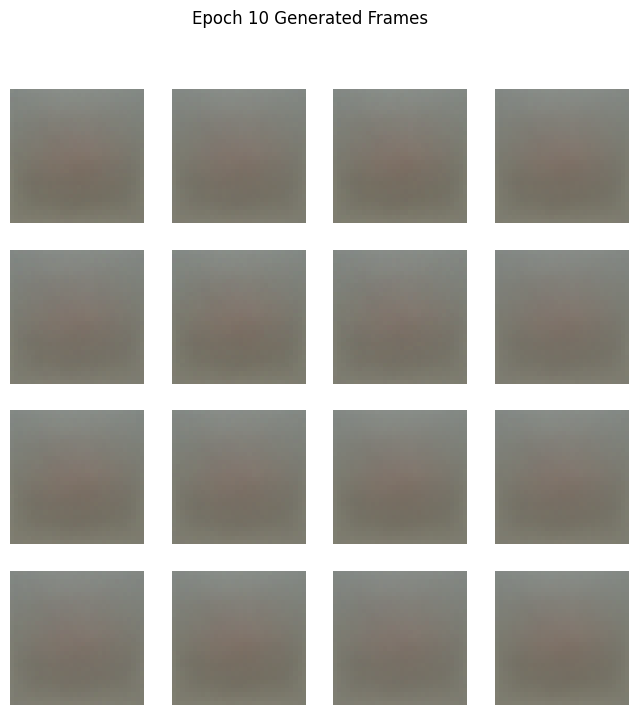

Epoch [11/20], Step [100/782], Loss: 0.2535
Epoch [11/20], Step [200/782], Loss: 0.2358
Epoch [11/20], Step [300/782], Loss: 0.2644
Epoch [11/20], Step [400/782], Loss: 0.2583
Epoch [11/20], Step [500/782], Loss: 0.2440
Epoch [11/20], Step [600/782], Loss: 0.2546
Epoch [11/20], Step [700/782], Loss: 0.2563


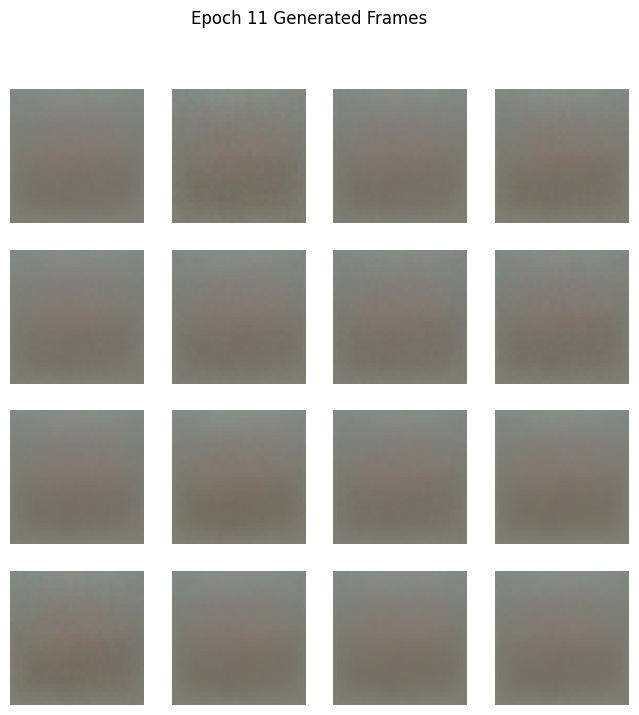

Epoch [12/20], Step [100/782], Loss: 0.2669
Epoch [12/20], Step [200/782], Loss: 0.2550
Epoch [12/20], Step [300/782], Loss: 0.2554
Epoch [12/20], Step [400/782], Loss: 0.2692
Epoch [12/20], Step [500/782], Loss: 0.2669
Epoch [12/20], Step [600/782], Loss: 0.2713
Epoch [12/20], Step [700/782], Loss: 0.2493


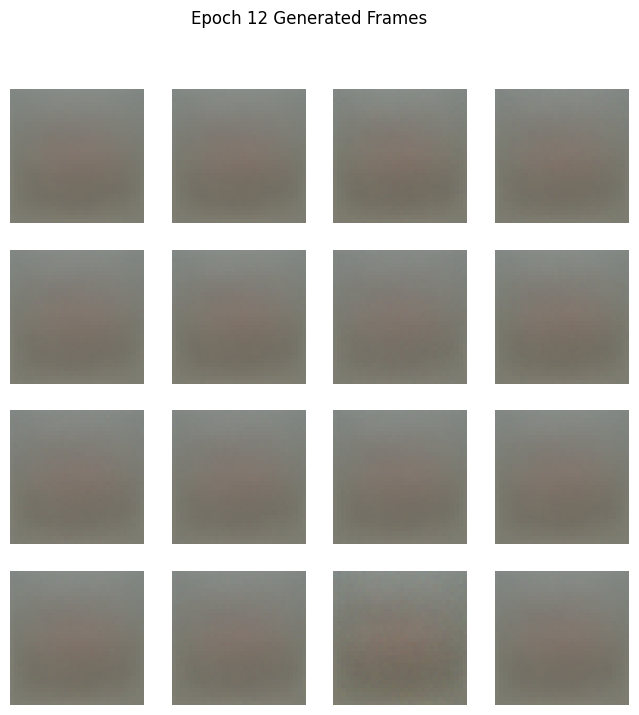

Epoch [13/20], Step [100/782], Loss: 0.2541
Epoch [13/20], Step [200/782], Loss: 0.2585
Epoch [13/20], Step [300/782], Loss: 0.2673
Epoch [13/20], Step [400/782], Loss: 0.2162
Epoch [13/20], Step [500/782], Loss: 0.2483
Epoch [13/20], Step [600/782], Loss: 0.2476
Epoch [13/20], Step [700/782], Loss: 0.2316


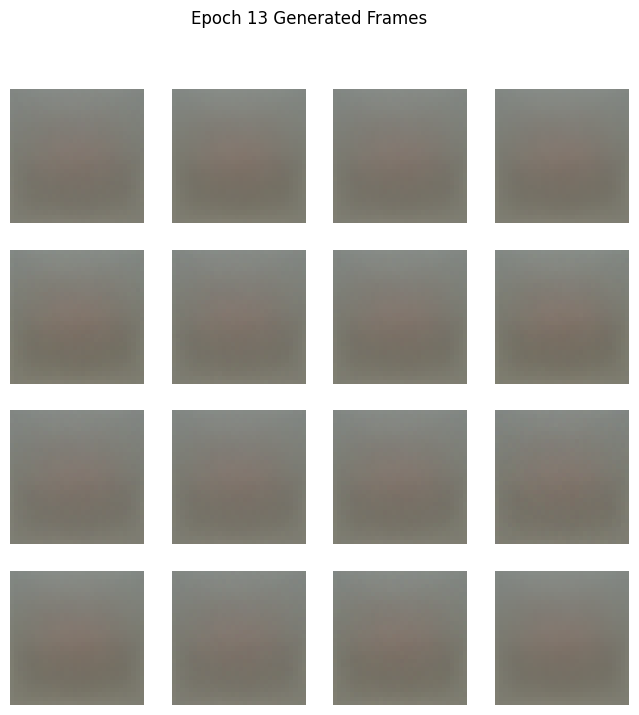

Epoch [14/20], Step [100/782], Loss: 0.2522
Epoch [14/20], Step [200/782], Loss: 0.2335
Epoch [14/20], Step [300/782], Loss: 0.2725
Epoch [14/20], Step [400/782], Loss: 0.2384
Epoch [14/20], Step [500/782], Loss: 0.2552
Epoch [14/20], Step [600/782], Loss: 0.2172
Epoch [14/20], Step [700/782], Loss: 0.2669


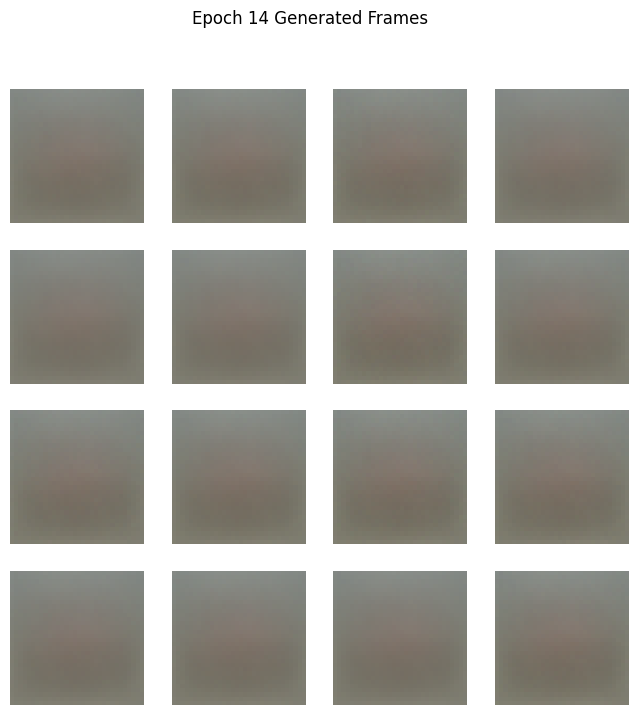

Epoch [15/20], Step [100/782], Loss: 0.2571
Epoch [15/20], Step [200/782], Loss: 0.2538
Epoch [15/20], Step [300/782], Loss: 0.2524
Epoch [15/20], Step [400/782], Loss: 0.2457
Epoch [15/20], Step [500/782], Loss: 0.2633
Epoch [15/20], Step [600/782], Loss: 0.2461
Epoch [15/20], Step [700/782], Loss: 0.2485


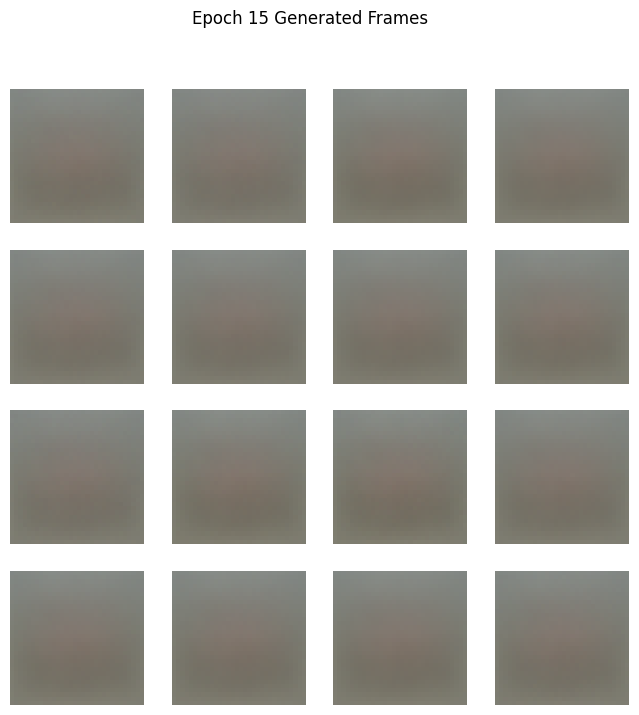

Epoch [16/20], Step [100/782], Loss: 0.2764
Epoch [16/20], Step [200/782], Loss: 0.2391
Epoch [16/20], Step [300/782], Loss: 0.2579
Epoch [16/20], Step [400/782], Loss: 0.2293
Epoch [16/20], Step [500/782], Loss: 0.2331
Epoch [16/20], Step [600/782], Loss: 0.2427
Epoch [16/20], Step [700/782], Loss: 0.2477


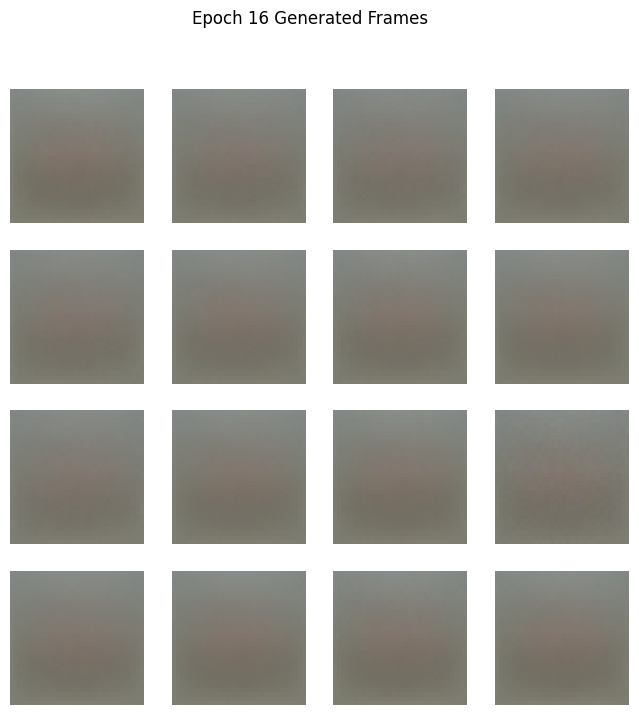

Epoch [17/20], Step [100/782], Loss: 0.2566
Epoch [17/20], Step [200/782], Loss: 0.2567
Epoch [17/20], Step [300/782], Loss: 0.2520
Epoch [17/20], Step [400/782], Loss: 0.2582
Epoch [17/20], Step [500/782], Loss: 0.2506
Epoch [17/20], Step [600/782], Loss: 0.2506
Epoch [17/20], Step [700/782], Loss: 0.2518


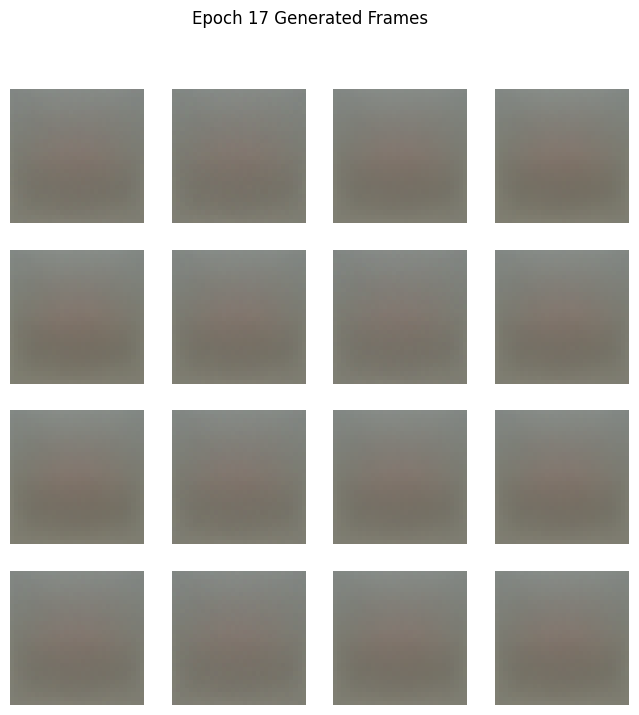

Epoch [18/20], Step [100/782], Loss: 0.2338
Epoch [18/20], Step [200/782], Loss: 0.2174
Epoch [18/20], Step [300/782], Loss: 0.2553
Epoch [18/20], Step [400/782], Loss: 0.2629
Epoch [18/20], Step [500/782], Loss: 0.2552
Epoch [18/20], Step [600/782], Loss: 0.2419
Epoch [18/20], Step [700/782], Loss: 0.2300


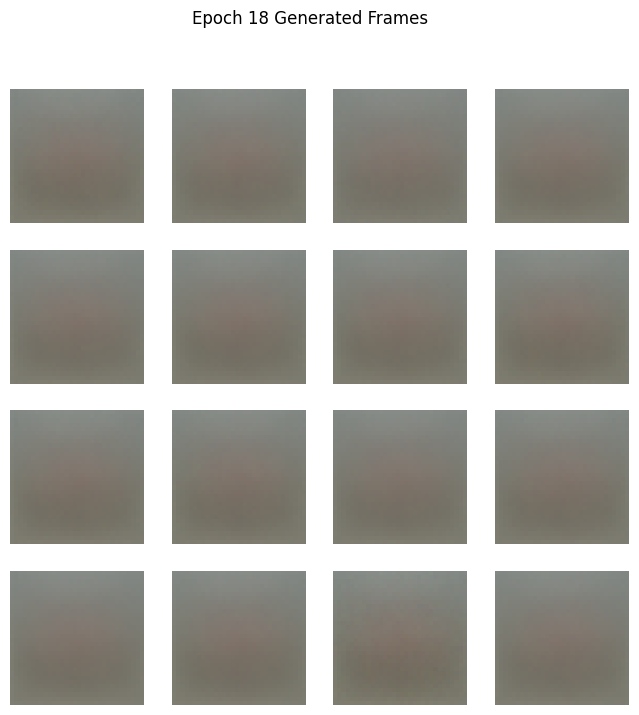

Epoch [19/20], Step [100/782], Loss: 0.2634
Epoch [19/20], Step [200/782], Loss: 0.2351
Epoch [19/20], Step [300/782], Loss: 0.2507
Epoch [19/20], Step [400/782], Loss: 0.2555
Epoch [19/20], Step [500/782], Loss: 0.2504
Epoch [19/20], Step [600/782], Loss: 0.2304
Epoch [19/20], Step [700/782], Loss: 0.2384


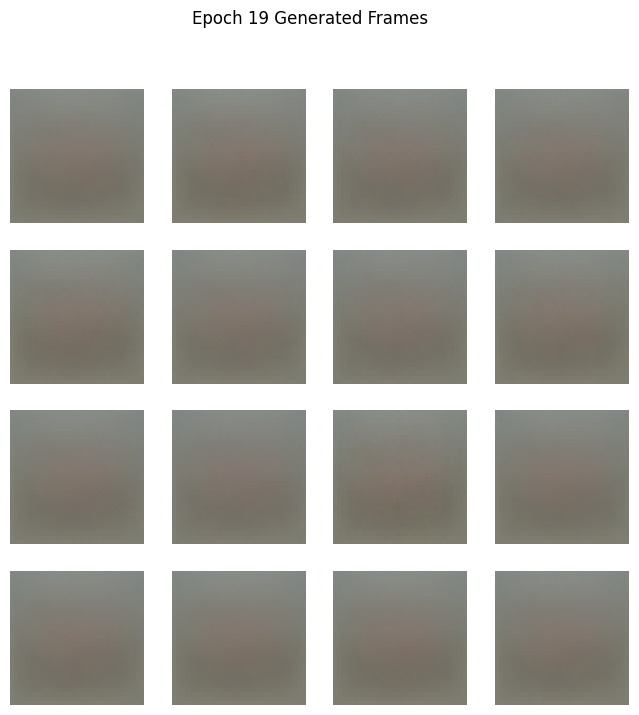

Epoch [20/20], Step [100/782], Loss: 0.2446
Epoch [20/20], Step [200/782], Loss: 0.2497
Epoch [20/20], Step [300/782], Loss: 0.2560
Epoch [20/20], Step [400/782], Loss: 0.2363
Epoch [20/20], Step [500/782], Loss: 0.2413
Epoch [20/20], Step [600/782], Loss: 0.2646
Epoch [20/20], Step [700/782], Loss: 0.2620


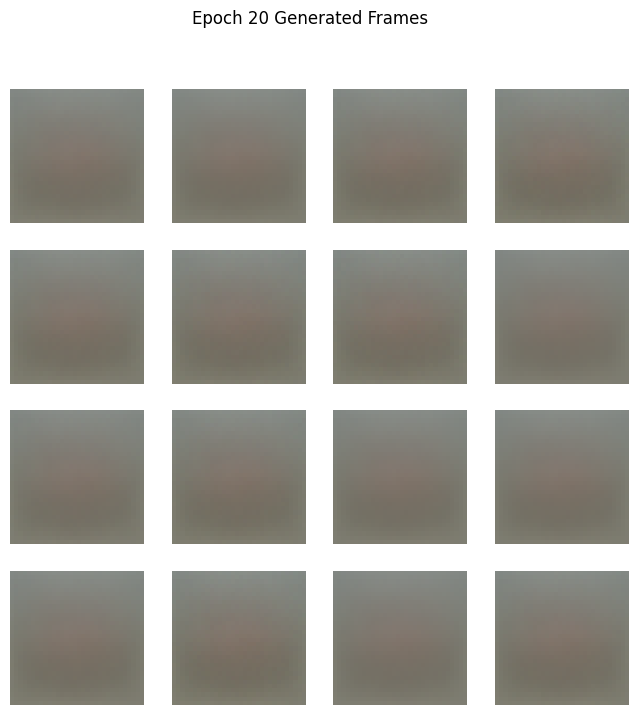

In [22]:
num_epochs =10  # Keep low to train quickly in Colab

for epoch in range(num_epochs):
    for i, (real_images, _) in enumerate(trainloader):
        real_images = real_images.cuda()
        noise = torch.randn(real_images.size(0), input_size).cuda()
        fake_images = generator(noise)
        loss = criterion(fake_images, real_images)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(trainloader)}], Loss: {loss.item():.4f}")

    # ✅ Show generated frames after each epoch
    with torch.no_grad():
        test_noise = torch.randn(16, input_size).cuda()
        gen_images = generator(test_noise).cpu()
        gen_images = (gen_images + 1) / 2  # Rescale to [0,1]

        plt.figure(figsize=(8,8))
        for j in range(16):
            plt.subplot(4, 4, j+1)
            plt.imshow(gen_images[j].permute(1, 2, 0))
            plt.axis('off')
        plt.suptitle(f"Epoch {epoch+1} Generated Frames")
        plt.show()

In [21]:
torch.save(generator.state_dict(), "generator_model.pth")
print("Model saved.")

Model saved.


# New Section